# CSE 185 Project - Supplemental File

To begin, we made a new directory called ```CSE_185_Project``` and inside this directory, we created a txt file called ```accessions.txt``` that contains all the accessions codes listed in Figure 2 of the [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5339205/).

## 1. Downloading the data

Then, we used the code below to compile all the fasta files from the accessions into a large fasta file titled ```project_genomes.fa```. The code in the cell below loops through the accessions stored in the lines of ```accessions.txt```, and uses ```curl``` to load in the sequences. The ```sed``` command in the second cell below enables us to remove extra spaces and newlines in the large fasta file.

This cell stores sequences from all required accession codes into the ```project_genomes.fa``` file:

In [1]:
%%bash
FILENAME="/home/hsaha/CSE_185_project/accessions.txt"
LINES=$(cat $FILENAME)

for LINE in $LINES

do
    curl "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=$LINE&rettype=fasta&retmode=text" >> ~/CSE_185_project/project_genomes.fa  
done 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1156    0  1156    0     0   2051      0 --:--:-- --:--:-- --:--:--  2049
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2391      0 --:--:-- --:--:-- --:--:--  2394
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1001    0  1001    0     0   1801      0 --:--:-- --:--:-- --:--:--  1800
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2399      0 --:--:-- --:--:-- --:--:--  2404
  % Total    % Received % Xferd  Average Speed   Tim

This command removes any extra spaces in the file of compiled sequences ```project_genomes.fa ```:

In [2]:
!sed -i '/^$/d' ~/CSE_185_project/project_genomes.fa 

## 2. Multiple Sequence Alignment

### 2.1 Downloading and Installing ClustalW:

Now that we had the input data for our project, we need to download the ClustalW (version 2.1) package for the next step of the pipeline: multiple sequence alignment. From the [clustalw website](http://www.clustal.org/download/current/), we downloaded the [clustalw-2.1.tar.gz](http://www.clustal.org/download/current/clustalw-2.1.tar.gz) package to our local system, and then manually uploaded it into the ```CSE_185_project``` directory.

To unzip the package file, we changed into the ```CSE_185_project directory``` via terminal and typed in the command ``` tar xfvz clustalw-2.1.tar.gz```.

Because we did not have root access to install and use ClustalW, we had to install it for our user only, which can be done using the steps [here](https://unix.stackexchange.com/questions/59331/compile-a-program-without-sudo-access) and also outlined below:
- In the directory ```CSE_185_project```, cd into the  ```clustalw-2.1``` directory
- Type in the command ```./configure --prefix=$HOME```
- Type in the command ``` make ```
- Type in the command ```make install```
- Type in the command ```export PATH=$HOME/bin:$PATH```


### 2.2 Running ClustalW:

Now, to run ClustalW for multiple sequence alignment, we changed into the ```CSE_185_Project``` directory (since this is where the fasta file, ```project_genomes.fa ```, that will be the input for ClustalW, is stored). Then, we typed in ```clustalw2``` into terminal and selected options as outlined below:
- Type in 1 (1. Sequence Input From Disc)
- Type in ```project_genomes.fa``` (Enter the name of the sequence file)
- Type in 2 (2. Multiple Alignments)
- Type in 9 (9. Output format options)
- Type in F (F. Toggle FASTA format output) 
    - this is because RaxML takes in only fasta of phylip files
    - also check that  9. Toggle output order =  ALIGNED so that the sequence is in order of alignment and not input
- Hit enter or return
- Type in 1 (1.  Do complete multiple alignment now Slow/Accurate)
- Hit enter (Enter a name for the CLUSTAL output file  [project_genomes.aln])
- Hit enter (Enter a name for the Fasta output file  [project_genomes.fasta])
- Hit enter (Enter name for new GUIDE TREE file   [project_genomes.dnd])


The ClustalW algorithm will then display a warning as below. When faced with the warning type in ```y```. We will run the program again on the subset of the data such that a warning is not generated, which is explained below this cell:

<img src="Screen%20Shot%202022-05-28%20at%201-Copy1.56.41%20PM.png">

As seen in the image above, the warning lists accession codes that are ```too divergent to be aligned```. Since the paper does not mention any divergence, but we are not sure whether or not the divergence has enough of an impact on our tree to be considered fatal, in addition to alignment of all accessions, we will download data from a subset of the accessions to run ClustalW on for comparison.

We created a file ```accessions_left.txt``` which only excluded accessions to the right of the warning ```( EF467837 and EF467839 )```, and similarly created a file ```accessions_right.txt``` which only excluded accessions to the left of the warning, stored in the ```CSE_185_Project``` directory. We repeated steps in section 1 using these files.

For ```accessions_left.txt```, with output stored in ```project_genomes_left.fa```:

In [3]:
%%bash
FILENAME="/home/hsaha/CSE_185_project/accessions_left.txt"
LINES=$(cat $FILENAME)

for LINE in $LINES

do
    curl "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=$LINE&rettype=fasta&retmode=text" >> ~/CSE_185_project/project_genomes_left.fa  
done 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1156    0  1156    0     0   2098      0 --:--:-- --:--:-- --:--:--  2098
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2066      0 --:--:-- --:--:-- --:--:--  2069
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1001    0  1001    0     0   1989      0 --:--:-- --:--:-- --:--:--  1990
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2218      0 --:--:-- --:--:-- --:--:--  2220
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
!sed -i '/^$/d' ~/CSE_185_project/project_genomes_left.fa 

For ```accessions_right.txt```, with output stored in ```project_genomes_right.fa```:

In [5]:
%%bash
FILENAME="/home/hsaha/CSE_185_project/accessions_right.txt"
LINES=$(cat $FILENAME)

for LINE in $LINES

do
    curl "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=$LINE&rettype=fasta&retmode=text" >> ~/CSE_185_project/project_genomes_right.fa  
done 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1156    0  1156    0     0   2232      0 --:--:-- --:--:-- --:--:--  2231
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2422      0 --:--:-- --:--:-- --:--:--  2424
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1001    0  1001    0     0   2129      0 --:--:-- --:--:-- --:--:--  2129
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1159    0  1159    0     0   2431      0 --:--:-- --:--:-- --:--:--  2434
  % Total    % Received % Xferd  Average Speed   Tim

In [6]:
!sed -i '/^$/d' ~/CSE_185_project/project_genomes_right.fa 

We repeat the steps for running ClustalW on ```project_genomes_left.fa``` (see options selected for running ClustalW on ```project_genomes.fa``` for all accession codes) successfully, this time with no warning. However, attempting to run ClustalW on ```project_genomes_right.fa``` (consisting of accession codes ``` EF467837 and EF467839 ```), a warning is displayed as below. To deal with this warning by taking a subset, we would have to exclude a significant number of accessions making our results incomparable to the results generated on all accessions, so we only use ClustalW on the ```project_genomes_left.fa``` subset:

<img src="Screen%20Shot%202022-05-28%20at%203-Copy1.14.01%20PM.png">

## 3. Generating the Phylogenetic Tree 

### 3.1 Installing RaxML:

Because the paper did not specify which algorithm was used to generate the phylogenetic tree, we decided to use RaxML (version 8.2.12). We did not have to download RaxML since we had done so as part of Lab 6. To download RaxML (as done in Lab 6), follow the steps below:

Locally download RaxML at [this link](https://github.com/stamatak/standard-RAxML/archive/refs/tags/v8.2.12.tar.gz), then upload manually into the lab6 directory.

While in the lab6 directory run the code below (see page 3 of [this github link](https://github.com/stamatak/standard-RAxML/blob/master/manual/NewManual.pdf)).

```
gunzip standard-RAxML-8.2.12.tar.gz
tar xf standard-RAxML-8.2.12.tar
```

To compile the SS3-PTHREADS version while in the lab6 directory (see [this link](https://github.com/stamatak/standard-RAxML)):
```
cd standard-RAxML-8.2.12/
make -f Makefile.SSE3.PTHREADS.gcc
rm *.o
cp raxmlHPC-PTHREADS-SSE3 ~/local/bin/raxml 
```

To call RaxML as part of this project, we navigated into the ```~/local/bin``` directory where RaxML is stored and type in the command ```export PATH=$PATH:$HOME/local/bin```, then cd back into the ```CSE_185_project``` directory.

### 3.2 Running RaxML on ```project_genomes.fasta```:

Because the paper did not mention any parameters used in the generation of the phylogenetic tree, except that "Nodal values represent bootstrap probabilities based on 500 replicates" so we used 500 for the value of our bootstrap option. We decided to use both the ```GTRCAT``` and ```GTRGAMMA``` methods. These methods use different parameters to generate the maximum likelihood tree, and are therefore likely to output different trees, which is why we used both as we were unsure which one would give results closer to those of the paper.

##### GTRCAT

To find the maximum likelihood tree based on the ClustalW alignment: 

```raxml -s project_genomes.fasta -m GTRCAT -n project_raxml_GTRCAT -p 12345 -# 20 -T 10```

To perform the bootstrap search (500 replicates):

```raxml -s project_genomes.fasta -n project_raxml_bs_GTRCAT -m GTRCAT -p 12345 -b 12345 -# 500```

To draw bipartitions (bootstrap values) on the best tree generated by the first command:

```raxml -f b -m GTRCAT -p 12345 -t RAxML_bestTree.project_raxml_GTRCAT -n project_raxml_bs_ann_GTRCAT -z RAxML_bootstrap.project_raxml_bs_GTRCAT```

##### GTRGAMMA

To find the maximum likelihood tree based on the ClustalW alignment:

```raxml -s project_genomes.fasta -m GTRGAMMA  -n project_raxml_GTRGAMMA -p 12345 -# 20 -T 10```

To perform the bootstrap search (500 replicates):

```raxml -s project_genomes.fasta -n project_raxml_bs_GTRGAMMA -m GTRGAMMA  -p 12345 -b 12345 -# 500```

To draw bipartitions (bootstrap values) on the best tree generated by the first command:

```raxml -f b -m GTRGAMMA  -p 12345 -t RAxML_bestTree.project_raxml_GTRGAMMA -n project_raxml_bs_ann_GTRGAMMA -z RAxML_bootstrap.project_raxml_bs_GTRGAMMA```


### 3.3 Running RaxML ```project_genomes_left.fasta```:

We then ran RaxML on the ```project_genomes_left.fasta``` file (output of running clustalw2 on ```project_genomes_left.fa```. 

##### GTRCAT

To first find the maximum likelihood tree based on the ClustalW alignment 

```raxml -s project_genomes_left.fasta -m GTRCAT -n project_raxml_left_GTRCAT -p 12345 -# 20 -T 10```

To perform the bootstrap search (500 replicates):

```raxml -s project_genomes_left.fasta -n project_raxml_left_bs_GTRCAT -m GTRCAT -p 12345 -b 12345 -# 500```

To draw bipartitions (bootstrap values) on the best tree generated by the first command

```raxml -f b -m GTRCAT -p 12345 -t RAxML_bestTree.project_raxml_left_GTRCAT -n project_raxml_left_bs_ann_GTRCAT -z RAxML_bootstrap.project_raxml_left_bs_GTRCAT```

##### GTRGAMMA

To first find the maximum likelihood tree based on the ClustalW alignment 

```raxml -s project_genomes_left.fasta -m GTRGAMMA -n project_raxml_left_GTRGAMMA -p 12345 -# 20 -T 10```

To perform the bootstrap search (500 replicates):

```raxml -s project_genomes_left.fasta -n project_raxml_left_bs_GTRGAMMA -m GTRGAMMA  -p 12345 -b 12345 -# 500```

To draw bipartitions (bootstrap values) on the best tree generated by the first command

```raxml -f b -m GTRGAMMA  -p 12345 -t RAxML_bestTree.project_raxml_left_GTRGAMMA -n project_raxml_left_bs_ann_GTRGAMMA -z RAxML_bootstrap.project_raxml_left_bs_GTRGAMMA```

## 4. Visualizing Phylogenetic Trees:

Because the paper did not specify which technology was used to generate the phylogenetic tree visualizations, we decided to use [iTOL](https://itol.embl.de/upload.cgi). For all trees, the text from the corresponding file starting with ```RAxML_bipartitionsBranchLabels``` was copied into the website and uploaded. The options selected on the control panel for display were ```Basic > Mode options > Branch lengths > Ignore``` and ```Advanced > Bootstraps > Display > Text > Label Background > On```.

### 4.1 Visualizing Phylogenetic Trees for ```project_genomes.fasta```:

The output phylogenetic trees for ```project_genomes.fasta``` are stored in

```RAxML_bipartitionsBranchLabels.project_raxml_bs_ann_GTRCAT``` (GTRCAT method) and

```RAxML_bipartitionsBranchLabels.project_raxml_bs_ann_GTRGAMMA``` (GTRGAMMA method)

#### 4.1.1 GTRCAT Tree for ```project_genomes.fasta```:

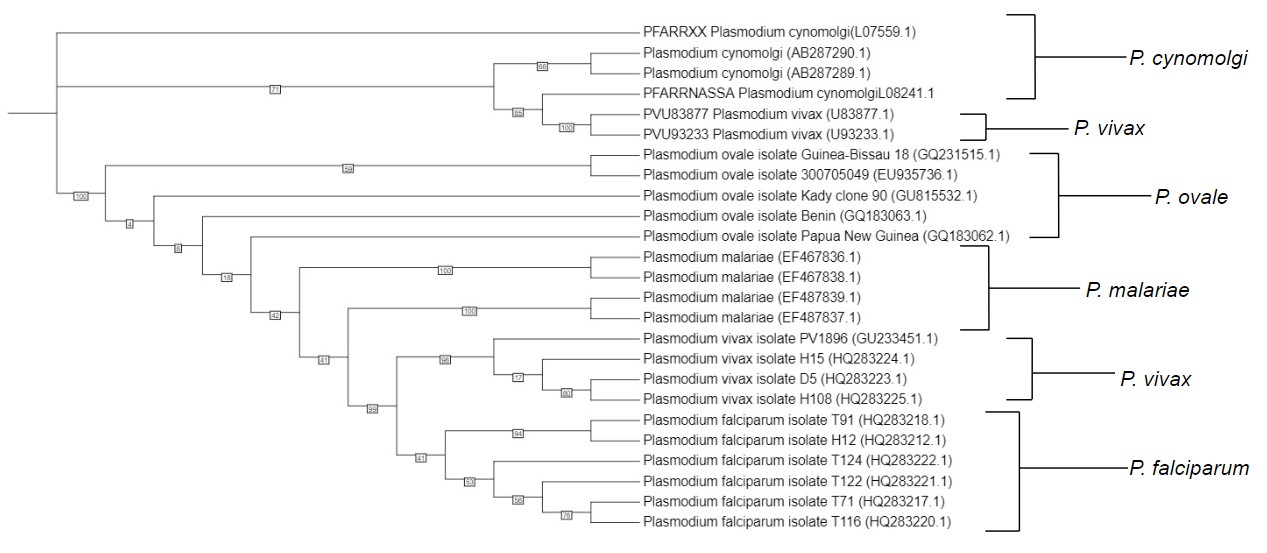

#### 4.1.2 GTRGAMMA Tree for ```project_genomes.fasta```:

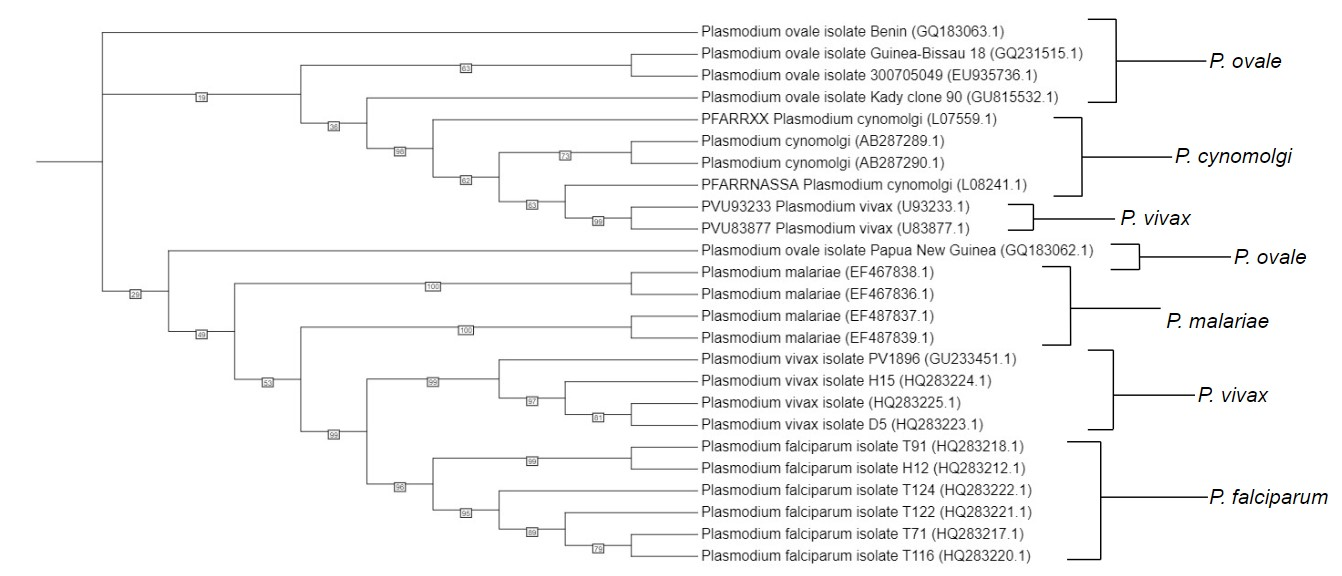

### 4.2 Visualizing Phylogenetic Trees for ```project_genomes_left.fasta```:

The output phylogenetic trees for ```project_genomes_left.fasta``` are stored in 

```RAxML_bipartitionsBranchLabels.project_raxml_left_bs_ann_GTRCAT``` (GTRCAT method) and 

```RAxML_bipartitionsBranchLabels.project_raxml_left_bs_ann_GTRGAMMA``` (GTRGAMMA method)

#### 4.2.1 GTRCAT Tree for ```project_genomes_left.fasta```:

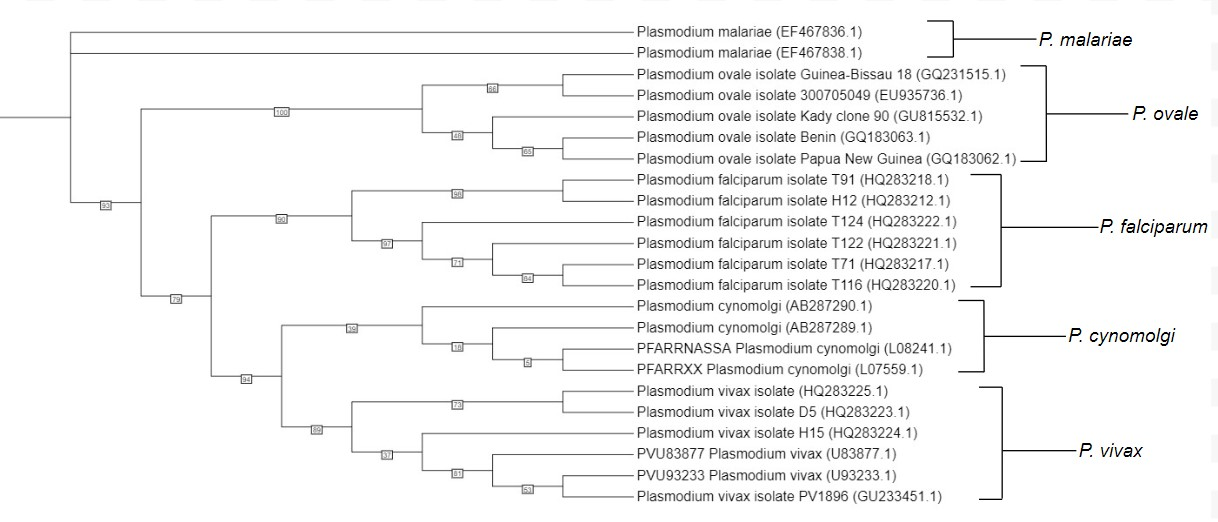

#### 4.2.2 GTRGAMMA Tree for ```project_genomes_left.fasta```:

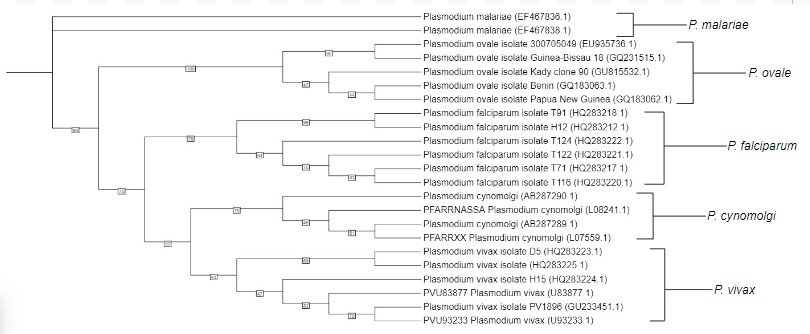